In [136]:
import numpy as np
from tensorflow import keras
%matplotlib inline
from matplotlib import pyplot as plt

In [137]:
labels = np.load('label.npy')
data = np.load('dataset.npy')

In [138]:
print('label shape:', labels.shape)
print('data shape:', data.shape)

label shape: (7032,)
data shape: (7032, 45)


In [139]:
test_ratio = .20
train_count = int( len(data) * ( 1.0 - test_ratio))

x_train = data[:train_count]
y_train = labels[:train_count]
x_test = data[train_count+1:]
y_test = labels[train_count+1:]

input_shape = (x_train.shape[1],)

print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

print('input shape:', input_shape)

x_train shape: (5625, 45)
y_train shape: (5625,)
x_test shape: (1406, 45)
y_test shape: (1406,)
input shape: (45,)


In [140]:
model = keras.models.Sequential()

# hidden layer
model.add( keras.layers.Dense(512, input_shape=input_shape, activation='relu'))
model.add( keras.layers.Dense(256,  activation='relu'))
#output layer
model.add( keras.layers.Dense(1, activation='sigmoid'))

#sgd = keras.optimizers.SGD()
# compile to model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 512)               23552     
_________________________________________________________________
dense_57 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 257       
Total params: 155,137
Trainable params: 155,137
Non-trainable params: 0
_________________________________________________________________


In [141]:
#train the model with train data
fit_history = model.fit(x_train, y_train,
  epochs=30 ,
  batch_size=32,
  validation_data=(x_test,y_test)
)

Train on 5625 samples, validate on 1406 samples
Epoch 1/30
5625/5625 [==============================] - 1s 203us/sample - loss: 3.9340 - acc: 0.7260 - val_loss: 3.3207 - val_acc: 0.7646
Epoch 2/30
5625/5625 [==============================] - 1s 119us/sample - loss: 2.9974 - acc: 0.7522 - val_loss: 2.9594 - val_acc: 0.7368
Epoch 3/30
5625/5625 [==============================] - 1s 119us/sample - loss: 2.4598 - acc: 0.7611 - val_loss: 2.4922 - val_acc: 0.7610
Epoch 4/30
5625/5625 [==============================] - 1s 114us/sample - loss: 3.0772 - acc: 0.7280 - val_loss: 2.6243 - val_acc: 0.7297
Epoch 5/30
5625/5625 [==============================] - 1s 114us/sample - loss: 2.7362 - acc: 0.7568 - val_loss: 2.4945 - val_acc: 0.7831
Epoch 6/30
5625/5625 [==============================] - 1s 114us/sample - loss: 1.9488 - acc: 0.7525 - val_loss: 2.3213 - val_acc: 0.7738
Epoch 7/30
5625/5625 [==============================] - 1s 119us/sample - loss: 1.5052 - acc: 0.7548 - val_loss: 2.1042 - va

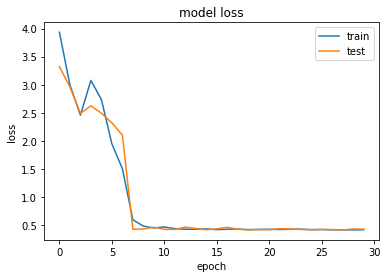

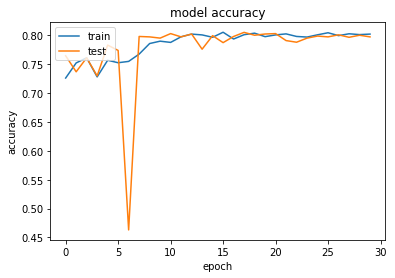

In [142]:
# show procession of training...
plt.plot(fit_history.history['loss'])
plt.plot(fit_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plt.plot(fit_history.history['acc'])
plt.plot(fit_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()